# Assignment 4

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle

---

## Part 1 - Random Graph Identification

For the first part of this assignment you will analyze randomly generated graphs and determine which algorithm created them.

In [2]:
G1 = nx.read_gpickle("assets/A4_P1_G1")
G2 = nx.read_gpickle("assets/A4_P1_G2")
G3 = nx.read_gpickle("assets/A4_P1_G3")
G4 = nx.read_gpickle("assets/A4_P1_G4")
G5 = nx.read_gpickle("assets/A4_P1_G5")
P1_Graphs = [G1, G2, G3, G4, G5]

<br>
`P1_Graphs` is a list containing 5 networkx graphs. Each of these graphs were generated by one of three possible algorithms:
* Preferential Attachment (`'PA'`)
* Small World with low probability of rewiring (`'SW_L'`)
* Small World with high probability of rewiring (`'SW_H'`)

Anaylze each of the 5 graphs using any methodology and determine which of the three algorithms generated each graph.

*The `graph_identification` function should return a list of length 5 where each element in the list is either `'PA'`, `'SW_L'`, or `'SW_H'`.*

In [3]:
import matplotlib.pyplot as plt

In [4]:
graph_d = {}
for idx, G_id in enumerate(['G1','G2','G3','G4','G5']):
    graph_d[G_id] = {}
    for node, degree in P1_Graphs[idx].degree():
        if degree in graph_d[G_id].keys():
            graph_d[G_id][degree] += 1
        else:
            graph_d[G_id][degree] = 1

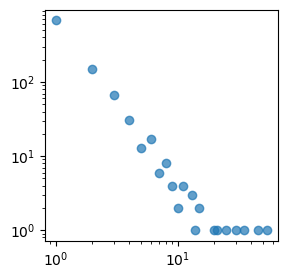

In [5]:
fig, ax = plt.subplots(figsize = (3,3))
d = graph_d['G1']
degs = d.keys()
node_count = d.values()
ax.scatter(degs, node_count, alpha=0.7)
ax.set_xscale("log")
ax.set_yscale("log")

<BarContainer object of 4 artists>

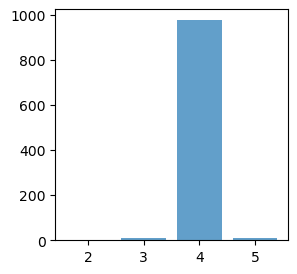

In [6]:
fig, ax = plt.subplots(figsize = (3,3))
d = graph_d['G2']
degs = d.keys()
node_count = d.values()
ax.bar(degs, node_count, alpha=0.7)

<BarContainer object of 3 artists>

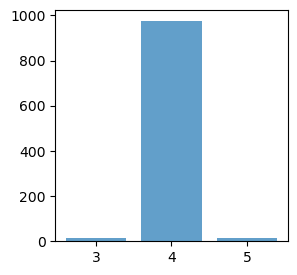

In [7]:
fig, ax = plt.subplots(figsize = (3,3))
d = graph_d['G3']
degs = d.keys()
node_count = d.values()
ax.bar(degs, node_count, alpha=0.7)

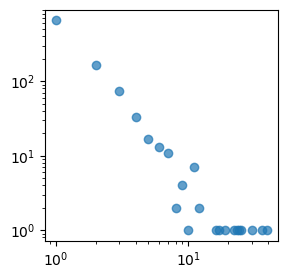

In [8]:
fig, ax = plt.subplots(figsize = (3,3))
d = graph_d['G4']
degs = d.keys()
node_count = d.values()
ax.scatter(degs, node_count, alpha=0.7)
ax.set_xscale("log")
ax.set_yscale("log")

<BarContainer object of 6 artists>

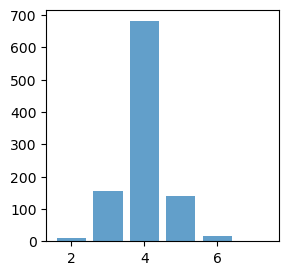

In [9]:
fig, ax = plt.subplots(figsize = (3,3))
d = graph_d['G5']
degs = d.keys()
node_count = d.values()
ax.bar(degs, node_count, alpha=0.7)

In [10]:
def graph_identification():
    
    # YOUR CODE HERE
    # raise NotImplementedError()
    return ['PA','SW_L','SW_L','PA','SW_H']

In [11]:
ans_one = graph_identification()
assert type(ans_one) == list, "You must return a list"


---

## Part 2 - Company Emails

For the second part of this assignment you will be working with a company's email network where each node corresponds to a person at the company, and each edge indicates that at least one email has been sent between two people.

The network also contains the node attributes `Department` and `ManagmentSalary`.

`Department` indicates the department in the company which the person belongs to, and `ManagmentSalary` indicates whether that person is receiving a managment position salary.

In [12]:
G = pickle.load(open('assets/email_prediction_NEW.txt', 'rb'))

print(f"Graph with {len(nx.nodes(G))} nodes and {len(nx.edges(G))} edges")

Graph with 1005 nodes and 16706 edges


### Part 2A - Salary Prediction

Using network `G`, identify the people in the network with missing values for the node attribute `ManagementSalary` and predict whether or not these individuals are receiving a managment position salary.

To accomplish this, you will need to create a matrix of node features of your choice using networkx, train a sklearn classifier on nodes that have `ManagementSalary` data, and predict a probability of the node receiving a managment salary for nodes where `ManagementSalary` is missing.



Your predictions will need to be given as the probability that the corresponding employee is receiving a managment position salary.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.75 or higher will recieve full points.

Using your trained classifier, return a Pandas series of length 252 with the data being the probability of receiving managment salary, and the index being the node id.

    Example:
    
        1       1.0
        2       0.0
        5       0.8
        8       1.0
            ...
        996     0.7
        1000    0.5
        1001    0.0
        Length: 252, dtype: float64

In [13]:
list(G.nodes(data=True))[:5] # print the first 5 nodes

[(0, {'Department': 1, 'ManagementSalary': 0.0}),
 (1, {'Department': 1, 'ManagementSalary': nan}),
 (581, {'Department': 3, 'ManagementSalary': 0.0}),
 (6, {'Department': 25, 'ManagementSalary': 1.0}),
 (65, {'Department': 4, 'ManagementSalary': nan})]

In [14]:
people = [tup[0] for tup in list(G.nodes(data=True))]
data = [tup[1] for tup in list(G.nodes(data=True))]
df = pd.DataFrame(data=data, index=people)
# df2 = pd.DataFrame(index=G.edges())
df.head()

,Department,ManagementSalary
0,1,0.0
1,1,NaN
581,3,0.0
6,25,1.0
65,4,NaN


In [15]:
deg_index = [person for person, degree in list(G.degree())]
deg_degree = [degree for person, degree in list(G.degree())]
df['degree'] = deg_degree
df['centrality'] = pd.Series(nx.degree_centrality(G))
df['clustering'] = pd.Series(nx.clustering(G))
df['closeness'] = pd.Series(nx.closeness_centrality(G))
df['btwn1'] = pd.Series(nx.betweenness_centrality(G, normalized=True, endpoints=False, k=10))
df['btwn2'] = pd.Series(nx.betweenness_centrality(G, normalized=True, endpoints=True, k=10))
df['btwn3'] = pd.Series(nx.betweenness_centrality(G, normalized=False, endpoints=False, k=10))
df['btwn4'] = pd.Series(nx.betweenness_centrality(G, normalized=True, endpoints=True, k=10))
df['btwn5'] = pd.Series(nx.betweenness_centrality(G, normalized=True, endpoints=False, k=25))
df['btwn6'] = pd.Series(nx.betweenness_centrality(G, normalized=True, endpoints=True, k=25))
df['btwn7'] = pd.Series(nx.betweenness_centrality(G, normalized=False, endpoints=False, k=25))
df['btwn8'] = pd.Series(nx.betweenness_centrality(G, normalized=True, endpoints=True, k=25))
df['pr1'] = pd.Series(nx.pagerank(G,alpha=0.8))
df['pr2'] = pd.Series(nx.pagerank(G,alpha=0.85))
df['pr3'] = pd.Series(nx.pagerank(G,alpha=0.9))
df['pr4'] = pd.Series(nx.pagerank(G,alpha=0.95))
df['hub'] = pd.Series(nx.hits(G)[0])
df['auth'] = pd.Series(nx.hits(G)[1])
# closeness, bewteeness, pagerank, scaled pagerank, hub/authority
df.head()

,Department,ManagementSalary,degree,centrality,clustering,closeness,btwn1,btwn2,btwn3,btwn4,btwn5,btwn6,btwn7,btwn8,pr1,pr2,pr3,pr4,hub,auth
0,1,0.0,44,0.043825,0.276423,0.421991,0.003431,0.001704,81.273250,0.001883,0.000124,0.001871,85.635385,0.001630,0.001202,0.001224,0.001246,0.001268,0.000944,0.000944
1,1,NaN,52,0.051793,0.265306,0.422360,0.000228,0.001112,210.909613,0.001655,0.000989,0.001875,1095.798511,0.002471,0.001395,0.001426,0.001458,0.001492,0.001472,0.001472
581,3,0.0,32,0.031873,0.248276,0.412974,0.000063,0.001247,21.360500,0.001012,0.000213,0.001134,37.460393,0.001130,0.000889,0.000894,0.000902,0.000913,0.000861,0.000861
6,25,1.0,115,0.114542,0.155183,0.475805,0.009122,0.015167,7481.274179,0.012756,0.003886,0.021793,1542.423617,0.006649,0.003045,0.003146,0.003241,0.003331,0.002554,0.002554
65,4,NaN,91,0.090637,0.172880,0.461049,0.010574,0.010510,2476.509774,0.008385,0.008521,0.010197,5120.935523,0.009096,0.002868,0.002857,0.002827,0.002776,0.002011,0.002011


In [16]:
dept_dict = {node: dic['Department'] for node, dic in G.nodes(data=True)}
dept_set = set(dept_dict.values())
pairs = [(send,rec) for (send,rec,attr) in list(G.edges(data=True))]
email_dict = {}
for node in list(G.nodes()):
    email_dict[node] = {}
    for dept in dept_set:
        email_dict[node][dept] = 0
for send,rec in pairs:
    rec_dept = dept_dict[rec]
    email_dict[send][rec_dept] += 1

In [17]:
for node, dic in email_dict.items():
    dept = dic.keys()
    count = dic.values()
    df.loc[node,dept] = count

In [18]:
Test = df[df['ManagementSalary'].map(np.isnan)]
Test_index = Test.index
TrainVal = df.drop(index=Test.index)
# features_columns = list(TrainVal.columns).pop('ManagementSalary')
features_columns = list(TrainVal.columns)
target_column = features_columns.pop(1)
X_trainval = TrainVal[features_columns]
y_trainval = TrainVal[target_column]
X_test = Test[features_columns]

In [19]:
def salary_predictions():
    from sklearn.preprocessing import StandardScaler
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import GridSearchCV
    
    scaler = StandardScaler()
    X_trainval_s = scaler.fit_transform(X_trainval)
    X_test_s = scaler.transform(X_test)
    
    randfor = RandomForestClassifier()
    grid_values = {"n_estimators":[10,15,25,50,100,200]}
    cv = 4
    randfor_grid = GridSearchCV(randfor, param_grid=grid_values, scoring='roc_auc', cv=cv)
    randfor_grid.fit(X_trainval_s, y_trainval)
    randfor = RandomForestClassifier(n_estimators=randfor_grid.best_params_['n_estimators'])
    randfor.fit(X_trainval_s, y_trainval)
    test_probs = pd.Series(randfor.predict_proba(X_test_s)[:,1],index=Test_index)
    # raise NotImplementedError()
    return test_probs
salary_predictions()

1      0.100
65     0.930
18     0.125
215    0.595
283    0.835
       ...  
691    0.000
788    0.010
944    0.000
798    0.000
808    0.005
Length: 252, dtype: float64

In [20]:
ans_salary_preds = salary_predictions()
assert type(ans_salary_preds) == pd.core.series.Series, "You must return a Pandas series"
assert len(ans_salary_preds) == 252, "The series must be of length 252"


### Part 2B - New Connections Prediction

For the last part of this assignment, you will predict future connections between employees of the network. The future connections information has been loaded into the variable `future_connections`. The index is a tuple indicating a pair of nodes that currently do not have a connection, and the `Future Connection` column indicates if an edge between those two nodes will exist in the future, where a value of 1.0 indicates a future connection.

In [21]:
future_connections = pd.read_csv('assets/Future_Connections.csv', index_col=0, converters={0: eval})
future_connections.head(10)

,Future Connection
"(6, 840)",0.0
"(4, 197)",0.0
"(620, 979)",0.0
"(519, 872)",0.0
"(382, 423)",0.0
"(97, 226)",1.0
"(349, 905)",0.0
"(429, 860)",0.0
"(309, 989)",0.0
"(468, 880)",0.0


paris = [tup[0] for tup in list(G.edges(data=True))]
data = [tup[1] for tup in list(G.edges(data=True))]
df = pd.DataFrame(data=data, index=pairs)
df.head()Using network `G` and `future_connections`, identify the edges in `future_connections` with missing values and predict whether or not these edges will have a future connection.

To accomplish this, you will need to:      
1. Create a matrix of features of your choice for the edges found in `future_connections` using Networkx     
2. Train a sklearn classifier on those edges in `future_connections` that have `Future Connection` data     
3. Predict a probability of the edge being a future connection for those edges in `future_connections` where `Future Connection` is missing.



Your predictions will need to be given as the probability of the corresponding edge being a future connection.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.75 or higher will recieve full points.

Using your trained classifier, return a series of length 122112 with the data being the probability of the edge being a future connection, and the index being the edge as represented by a tuple of nodes.

    Example:
    
        (107, 348)    0.35
        (542, 751)    0.40
        (20, 426)     0.55
        (50, 989)     0.35
                  ...
        (939, 940)    0.15
        (555, 905)    0.35
        (75, 101)     0.65
        Length: 122112, dtype: float64

In [22]:
num_nonedges = len(list(nx.non_edges(G)))
num_edges = len(list(G.edges()))
print("Number of Edges in G:\t\t",num_edges)
print("Number of Non-Edges in G:\t",num_nonedges,'\n')
print("Future Connections:\t\t",future_connections.shape[0])
print("Future Connections 0 or 1:\t",future_connections.value_counts().values.sum())
print("Missing Future Connections:\t",future_connections.shape[0]-future_connections.value_counts().values.sum())

Number of Edges in G:		 16706
Number of Non-Edges in G:	 488446 

Future Connections:		 488446
Future Connections 0 or 1:	 366334
Missing Future Connections:	 122112


In [23]:
fc = future_connections.copy()
fc.rename(columns={'Future Connection':'Target'}, inplace=True)
fc.head()

,Target
"(6, 840)",0.0
"(4, 197)",0.0
"(620, 979)",0.0
"(519, 872)",0.0
"(382, 423)",0.0


In [24]:
fc['PA'] = [p for (v,u,p) in nx.preferential_attachment(G,fc.index)]

In [25]:
fc['CN'] = fc.index.map(lambda pair: len(list(nx.common_neighbors(G, pair[0], pair[1]))))

In [26]:
fc['jacc'] = [p for (v,u,p) in nx.jaccard_coefficient(G,fc.index)]

In [27]:
fc['RAI'] = [p for (v,u,p) in nx.resource_allocation_index(G,fc.index)]

In [28]:
fc['AA'] = [p for (v,u,p) in nx.adamic_adar_index(G,fc.index)]

In [29]:
fc['Node1Comm'] = [dept_dict[pair[0]] for pair in fc.index] 

In [30]:
fc['Node2Comm'] = [dept_dict[pair[1]] for pair in fc.index] 

In [31]:
fc['SharedComm'] = fc['Node1Comm'] == fc['Node2Comm']

In [32]:
for node in G.nodes():
    G.nodes[node]['community'] = dept_dict[node]     

In [33]:
fc['CN_SH'] = [p for (v,u,p) in nx.cn_soundarajan_hopcroft(G,fc.index)]

In [34]:
fc['RAI_SH'] = [p for (v,u,p) in nx.ra_index_soundarajan_hopcroft(G,fc.index)]

In [35]:
fc['SharedComm'] = fc['SharedComm'].astype(int)

In [36]:
fc.head()

,Target,PA,CN,jacc,RAI,AA,Node1Comm,Node2Comm,SharedComm,CN_SH,RAI_SH
"(6, 840)",0.0,2070,9,0.073770,0.136721,2.110314,25,4,0,9,0.0
"(4, 197)",0.0,3552,2,0.015504,0.008437,0.363528,21,4,0,2,0.0
"(620, 979)",0.0,28,0,0.000000,0.000000,0.000000,4,23,0,0,0.0
"(519, 872)",0.0,299,2,0.060606,0.039726,0.507553,23,1,0,2,0.0
"(382, 423)",0.0,205,0,0.000000,0.000000,0.000000,7,10,0,0,0.0


In [41]:
Test = fc[fc['Target'].map(np.isnan)]
Test_index = Test.index
TrainVal = fc.drop(index=Test.index)
features_columns = list(TrainVal.columns)
target_column = features_columns.pop(0)
X_trainval = TrainVal[features_columns]
y_trainval = TrainVal[target_column]
X_test = Test[features_columns]

In [44]:
def new_connections_predictions():
    from sklearn.preprocessing import StandardScaler, LabelEncoder
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import GridSearchCV
    
    scaler = StandardScaler()
    X_trainval_s = scaler.fit_transform(X_trainval)
    X_test_s = scaler.transform(X_test)
    
    randfor = RandomForestClassifier()
    grid_values = {"n_estimators":[10,100]}
    cv = 2
    randfor_grid = GridSearchCV(randfor, param_grid=grid_values, scoring='roc_auc', cv=cv)
    randfor_grid.fit(X_trainval_s, y_trainval)
    randfor = RandomForestClassifier(n_estimators=randfor_grid.best_params_['n_estimators'])
    randfor.fit(X_trainval_s, y_trainval)
    test_probs = pd.Series(randfor.predict_proba(X_test_s)[:,1],index=Test_index)
    # raise NotImplementedError()
    return test_probs

In [45]:
ans_prob_preds = new_connections_predictions()
assert type(ans_prob_preds) == pd.core.series.Series, "You must return a Pandas series"
assert len(ans_prob_preds) == 122112, "The series must be of length 122112"


In [46]:
ans_prob_preds

(107, 348)    0.00000
(542, 751)    0.00000
(20, 426)     0.49000
(50, 989)     0.00000
(942, 986)    0.00000
               ...   
(165, 923)    0.00000
(673, 755)    0.00000
(939, 940)    0.00000
(555, 905)    0.16714
(75, 101)     0.00000
Length: 122112, dtype: float64